In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create plots folder if it doesn't exist
if not os.path.exists('../plots'):
    os.makedirs('../plots')

# Load the cleaned ML-ready dataset
df = pd.read_csv('../data/final_accidents_ml.csv')


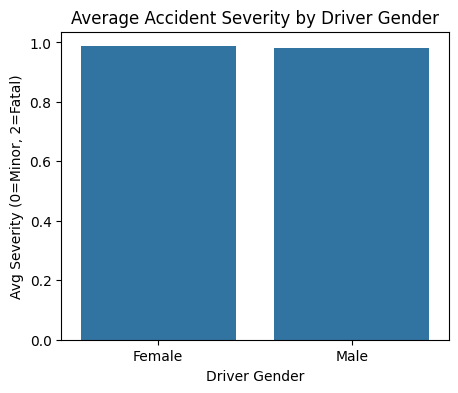

In [2]:
gender_severity = df.groupby('Driver Gender')['Severity_Encoded'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=gender_severity.index, y=gender_severity.values)
plt.title('Average Accident Severity by Driver Gender')
plt.ylabel('Avg Severity (0=Minor, 2=Fatal)')
plt.savefig('../plots/gender_vs_severity.png', bbox_inches='tight')
plt.show()


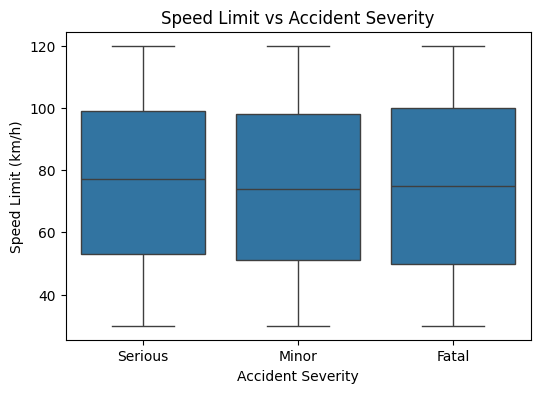

In [3]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Accident Severity', y='Speed Limit (km/h)', data=df)
plt.title('Speed Limit vs Accident Severity')
plt.savefig('../plots/speed_vs_severity.png', bbox_inches='tight')
plt.show()


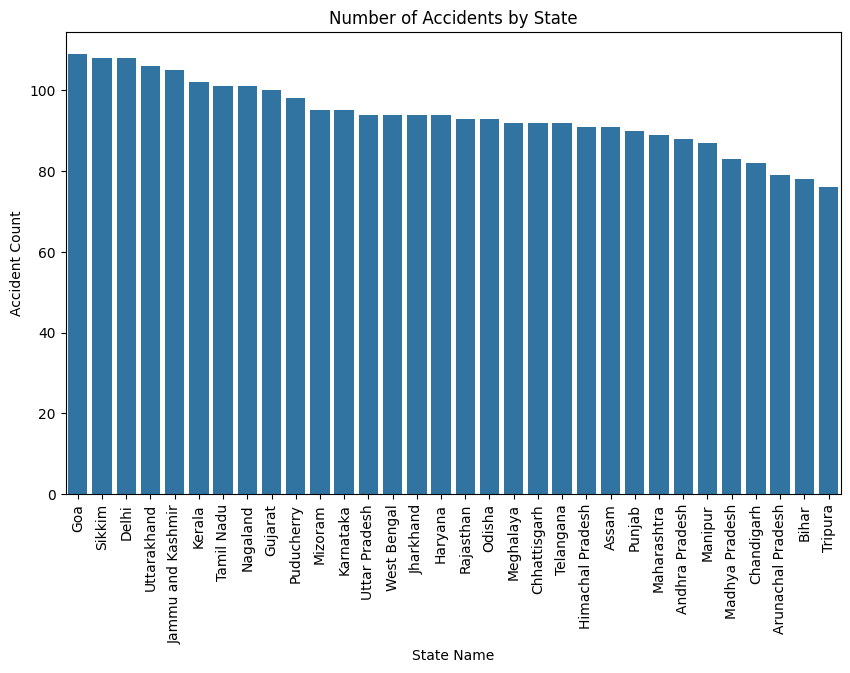

In [4]:
state_counts = df['State Name'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Accidents by State')
plt.ylabel('Accident Count')
plt.savefig('../plots/accidents_by_state.png', bbox_inches='tight')
plt.show()


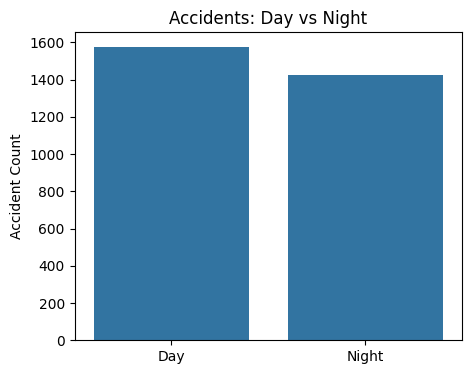

In [5]:
day_night_counts = df['Is_Night'].value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=['Day', 'Night'], y=day_night_counts.values)
plt.title('Accidents: Day vs Night')
plt.ylabel('Accident Count')
plt.savefig('../plots/day_vs_night.png', bbox_inches='tight')
plt.show()


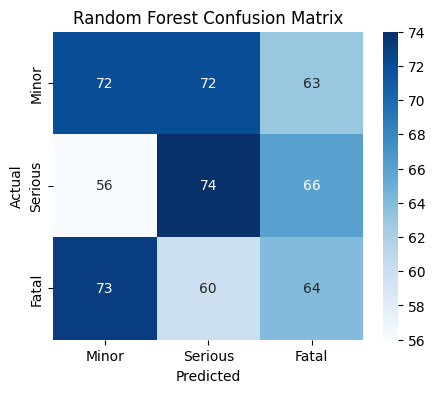

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Features
X = df[['Is_Night', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender']].copy()
X['Driver Gender'] = X['Driver Gender'].map({'Male':0, 'Female':1}).fillna(0)
y = df['Severity_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor','Serious','Fatal'], yticklabels=['Minor','Serious','Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.savefig('../plots/confusion_matrix.png', bbox_inches='tight')
plt.show()
